In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output/cropped_player.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

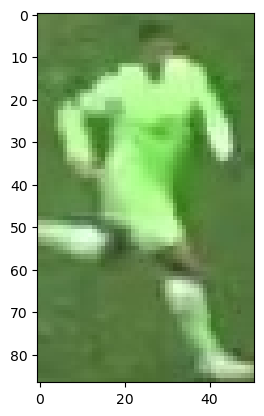

In [4]:
plt.imshow(image)
plt.show()

(43, 51, 3)


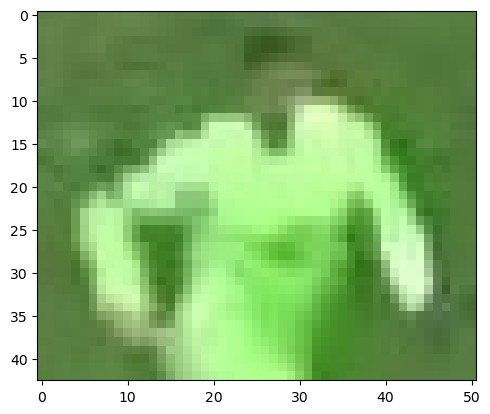

In [13]:
# Take top half of image
top_half = image[0: image.shape[0]//2, :]
plt.imshow(top_half)
plt.show()

# Cluster image into 2 clusters

In [15]:
image_2d = top_half.reshape(-1, 3)
print(image_2d.shape)

# k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

(2193, 3)


In [24]:
labels = kmeans.labels_

[1 1 1 ... 1 1 1]


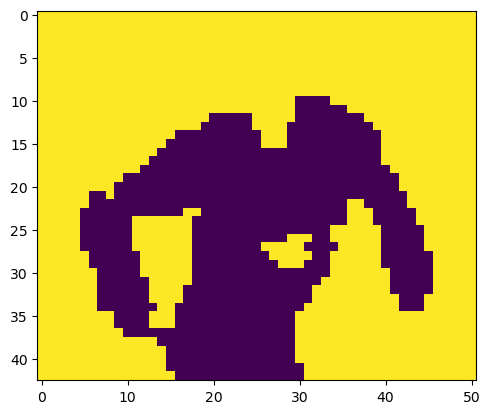

In [27]:
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])
plt.imshow(clustered_image)

In [36]:
# assume corner pixel is the background class
corner_cluster = [clustered_image[0,0], clustered_image[0,-1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_cluster), key=corner_cluster.count)
player_cluster = 1 - non_player_cluster

In [37]:
# color of player shirt
kmeans.cluster_centers_[player_cluster]

array([170.83892617, 235.34765101, 142.51677852])